In [10]:
import string, os, random, torch, torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.datasets as datasets

In [3]:
"""
N = number of data points (files) |{x^(i), y^(i)}i=1->N|
x^(i)=[x_1^(i),...] a bag of characters
M_i = number of characters in x_i
S = set of all character types (a,b,c...)
K_S = |S|
L = set of data labels (e,s,j)
K_L = |L|
"""

'\nN = number of data points (files) |{x^(i), y^(i)}i=1->N|\nx^(i)=[x_1^(i),...] a bag of characters\nM_i = number of characters in x_i\nS = set of all character types (a,b,c...)\nK_S = |S|\nL = set of data labels (e,s,j)\nK_L = |L|\n'

In [4]:
# name is the name of the file eg 'e0.txt'
# good_chars is a string of accepted characters
# returns list of good chars in the file
def read_file(name, good_chars=string.ascii_lowercase+" "):
    # init character list
    char_list = []
    # open file
    with open(f"languageID/{name}") as f:
        # look at each file
        for char in f.read():
            # check if the character is approved, if so append it
            if char in good_chars:
                char_list.append(char)
    return char_list

In [5]:
# data is a list
# target is a string
def prior(data, target, alpha, Kl=3):
    num = alpha
    for item in data:
        if item == target:
            num += 1
    return num / (len(data) + (Kl * alpha))

In [6]:
# get files x0.txt-x9.txt for x = e,s,j
train_data = []
for name in os.listdir("languageID"):
    # avoid scrambled file
    if len(name) < 8:
        if int(name[1:-4]) <= 9:
            train_data.append((name, read_file(name)))
p1_list = [tup[0][0] for tup in train_data]

In [7]:
prior_e = prior(p1_list, "e", alpha=0.5)
print("e:", prior_e)
prior_j = prior(p1_list, "j", alpha=0.5)
print("j:", prior_j)
prior_s = prior(p1_list, "s", alpha=0.5)
print("s:", prior_s)

e: 0.3333333333333333
j: 0.3333333333333333
s: 0.3333333333333333


In [8]:
# string of good characters
big_string = string.ascii_lowercase+" "
# dict[letter]->number i.e. a->0, b->1, ...
let_to_num = {}
for i in range(27):
    letter = big_string[i]
    let_to_num[letter] = i

In [9]:
def cond_prob(data, y_targ, alpha=0.5):
    # init thetas
    theta_nums = np.zeros(27) + alpha
    theta_dens = np.zeros(27)
    # init S
    S = []
    # loops through [(e0.txt, [a, b, ...]), (e1.txt, [...]), ...]
    for tup in data:
        # tup[0] is the file name
        # tup[1] is the list of chars
        # if the file is the target file
        if tup[0][0] == y_targ:
            # update S
            S = list(set(S + tup[1]))
            # loop through characters in the file
            for char in tup[1]:
                # get idx
                idx = let_to_num[char]
                # update params
                theta_nums[idx] += 1
            theta_dens += len(tup[1])
    return theta_nums / (theta_dens + (len(S)*alpha))

In [10]:
theta_e = cond_prob(train_data, "e")
theta_e

array([0.06016851, 0.01113497, 0.02151   , 0.02197258, 0.10536924,
       0.01893276, 0.01747894, 0.04721626, 0.05541054, 0.00142078,
       0.00373369, 0.02897737, 0.02051875, 0.05792169, 0.0644639 ,
       0.01675202, 0.0005617 , 0.05382455, 0.06618206, 0.08012556,
       0.02666446, 0.00928465, 0.01549645, 0.00115645, 0.01384437,
       0.00062779, 0.17924996])

In [11]:
theta_j = cond_prob(train_data, "j")
theta_j

array([1.31770215e-01, 1.08672863e-02, 5.48605773e-03, 1.72269201e-02,
       6.02068628e-02, 3.87867776e-03, 1.40121602e-02, 3.17632259e-02,
       9.70368300e-02, 2.34118387e-03, 5.74114194e-02, 1.43266476e-03,
       3.98001258e-02, 5.67125585e-02, 9.11663988e-02, 8.73576071e-04,
       1.04829129e-04, 4.28052275e-02, 4.21762527e-02, 5.69921029e-02,
       7.06198896e-02, 2.44601300e-04, 1.97428192e-02, 3.49430428e-05,
       1.41519324e-02, 7.72241247e-03, 1.23453770e-01])

In [12]:
theta_s = cond_prob(train_data, "s")
theta_s

array([1.04560451e-01, 8.23286362e-03, 3.75258241e-02, 3.97459221e-02,
       1.13810860e-01, 8.60287996e-03, 7.18448398e-03, 4.53270019e-03,
       4.98597021e-02, 6.62945947e-03, 2.77512257e-04, 5.29431717e-02,
       2.58086399e-02, 5.41765595e-02, 7.24923684e-02, 2.42669051e-02,
       7.67783910e-03, 5.92951189e-02, 6.57704049e-02, 3.56140730e-02,
       3.37023219e-02, 5.88942678e-03, 9.25040856e-05, 2.49761031e-03,
       7.86284728e-03, 2.68261848e-03, 1.68264932e-01])

In [13]:
# name is the name of the file "e10.txt"
# returns frequency list 
def get_theta(name):
    theta = np.zeros(27)
    for char in read_file(name):
        theta[let_to_num[char]] += 1
    return theta / sum(theta)

In [14]:
x_e10 = get_theta("e10.txt")
x_e10

array([0.0590991 , 0.01153153, 0.0190991 , 0.02054054, 0.11207207,
       0.01981982, 0.01837838, 0.05045045, 0.05045045, 0.00108108,
       0.00216216, 0.03063063, 0.02306306, 0.05009009, 0.06558559,
       0.0190991 , 0.00108108, 0.05081081, 0.06702703, 0.08108108,
       0.02342342, 0.01117117, 0.01693694, 0.00144144, 0.01369369,
       0.00072072, 0.17945946])

In [15]:
def p_hat(x_vec, theta_vec):
    tot = 0
    for i in range(len(x_vec)):
        tot += x_vec[i] * np.log(theta_vec[i])
    return np.exp(tot)

In [16]:
like_e = p_hat(x_e10, theta_e)
like_e

0.05925545365454994

In [17]:
like_j = p_hat(x_e10, theta_j)
like_j

0.042390040304332556

In [18]:
like_s = p_hat(x_e10, theta_s)
like_s

0.047298683887854596

In [19]:
# q6
print("e:", prior_e * like_e)
print("j:", prior_j * like_j)
print("s:", prior_s * like_s)
print("=> e")

e: 0.01975181788484998
j: 0.014130013434777518
s: 0.015766227962618198
=> e


In [20]:
# get files x10.txt-x19.txt for x = e,s,j
test_list = []
for name in os.listdir("languageID"):
    # avoid scrambled file
    if len(name) < 8:
        if int(name[1:-4]) > 9:
            test_list.append((name, read_file(name)))

In [21]:
# init a confusion matrix as a df
conf_dict = {}
langs = ["English", "Spanish", "Japanese"]
for real_lang in langs:
    conf_dict[real_lang + " (true)"] = {}
    for pred_lang in langs:
        conf_dict[real_lang + " (true)"][pred_lang + " (pred)"] = 0
conf_df = pd.DataFrame(conf_dict)

# make prior val and theta lists
lang_list = ['e', 's', 'j']
pri_dict = {}
theta_dict = {}
for lang in lang_list:
    pri_dict[lang] = prior(test_list, lang, alpha=0.5)
    theta_dict[lang] = cond_prob(test_list, lang)

# loop through data, calc x and make pred
for tup in test_list:
    # get the x vector
    x_vec = get_theta(tup[0])
    
    # find the likelihoods
    like_e = p_hat(x_vec, theta_dict['e']) * pri_dict['e']
    like_s = p_hat(x_vec, theta_dict['s']) * pri_dict['s']
    like_j = p_hat(x_vec, theta_dict['j']) * pri_dict['j']
    
    # see which likelihood is the greatest
    if like_e >= like_s and like_e >= like_j:
        pred = "English (pred)"
    if like_s > like_e and like_s >= like_j:
        pred = "Spanish (pred)"
    if like_j > like_s and like_j >= like_e:
        pred = "Japanese (pred)"
    
    # find the true label
    lab = tup[0][0]
    if lab == 'e':
        true = "English (true)"
    if lab == 's':
        true = "Spanish (true)"
    if lab == 'j':
        true = "Japanese (true)"
    
    # update the confusion matrix
    conf_df[true][pred] += 1

# view the confusion matrix
conf_df

,English (true),Spanish (true),Japanese (true)
English (pred),10,0,0
Spanish (pred),0,10,0
Japanese (pred),0,0,10


In [22]:
# get a file
scram = read_file("s15.txt")
# shuffle it
random.shuffle(scram)
# write the shuffled file
scram_string = "".join(scram)
with open("languageID\s15SCRAM.txt", "w") as f:
    f.write(scram_string)

In [23]:
# get the x vector
x_vec = get_theta("s15SCRAM.txt")

# find the likelihoods
like_e = p_hat(x_vec, theta_dict['e']) * pri_dict['e']
like_s = p_hat(x_vec, theta_dict['s']) * pri_dict['s']
like_j = p_hat(x_vec, theta_dict['j']) * pri_dict['j']

# see which likelihood is the greatest
if like_e >= like_s and like_e >= like_j:
    pred = "English (pred)"
if like_s > like_e and like_s >= like_j:
    pred = "Spanish (pred)"
if like_j > like_s and like_j >= like_e:
    pred = "Japanese (pred)"
pred

'Spanish (pred)'

In [24]:
def sigmoid(z):
    return (1+np.exp(-z))**(-1)

def soft_max(z_list):
    exp = np.exp(z_list)
    return exp / sum(exp)

In [25]:
def train_SGD(train_set, d, d1, d2, d3, k, alpha, batch_size, epochs, is_zero_w=True):
    # init weights
    if is_zero_w:
        W1 = np.zeros((d1, d))
        W2 = np.zeros((d2, d1))
        W3 = np.zeros((k, d2))
    # check stopping criteria
    for i in range(epochs):
        pass
        # sample training pts
        # compute f(network)
        # compute gradients
        # update weights
    # return weights
    pass

In [8]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

In [13]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [14]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

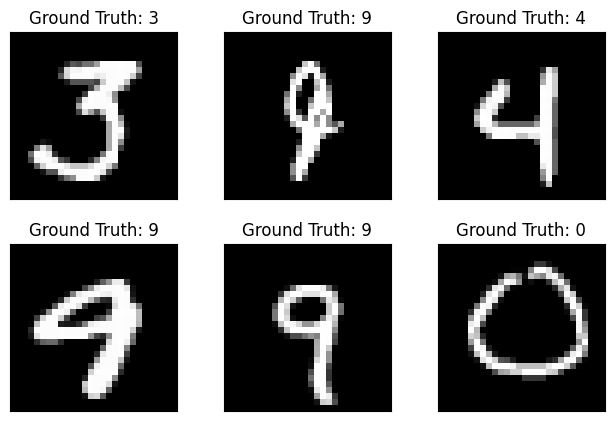

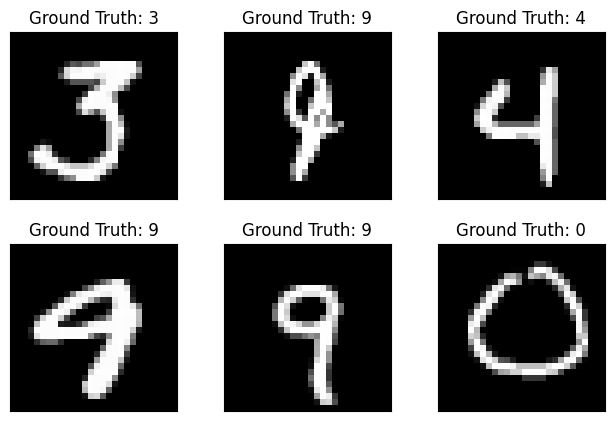

In [15]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig